<a href="https://colab.research.google.com/github/ZY0TT0/Deep-Learning-Lab/blob/main/26sept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [39]:
print("LOADING YOLO")
net = cv2.dnn.readNet("yolov3.weights", "yolov3 (1).cfg")


LOADING YOLO


In [40]:
classes = []
with open("coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]


In [41]:
layer_names = net.getLayerNames()


In [42]:
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
print("YOLO LOADED")


YOLO LOADED


Input Image:


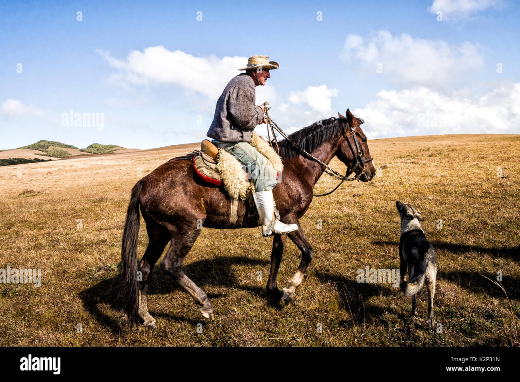

In [43]:
img = cv2.imread("man.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
print("Input Image:")
cv2_imshow(img)


In [44]:
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True,crop=False)


In [45]:
net.setInput(blob)
outs = net.forward(output_layers)

In [46]:
class_ids = []
confidences = []
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.3:
      # Object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)
 # Rectangle coordinates
      x = int(center_x - w / 2)
      y = int(center_y - h / 2)
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)



In [47]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences, 0.5, 0.4)


In [48]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))
for i in range(len(boxes)):
  if i in indexes:
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    # Draw the bounding box
    cv2.rectangle(img, (x, y), (x +w, y + h), color, 2)
 # Draw the label
    cv2.putText(img, label, (x, y -5), cv2.FONT_HERSHEY_SIMPLEX, 1/2, color, 2)
    print(f"Detected object:{label}, confidence: {confidences[i]}, box: {x},{w}, {h}")


Detected object:horse, confidence: 0.9989714622497559, box: 106,277, 223
Detected object:person, confidence: 0.9844671487808228, box: 204,78, 191
Detected object:dog, confidence: 0.9938144087791443, box: 394,43, 112


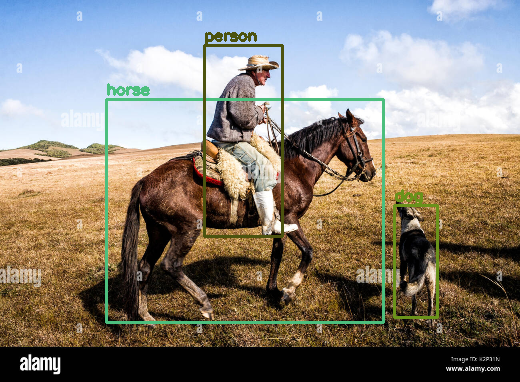

-1

In [49]:
#Display the image
cv2_imshow(img)
cv2.waitKey(0)